In [1]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.6 MB/s eta 0:00:00


In [9]:
from gradio_client import Client, file
client = Client("Nymbo/Virtual-Try-On")

Loaded as API: https://nymbo-virtual-try-on.hf.space ✔


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
human_image_path = "/content/trail2.jpg"
garment_image_path = "/content/dress1.jpg"

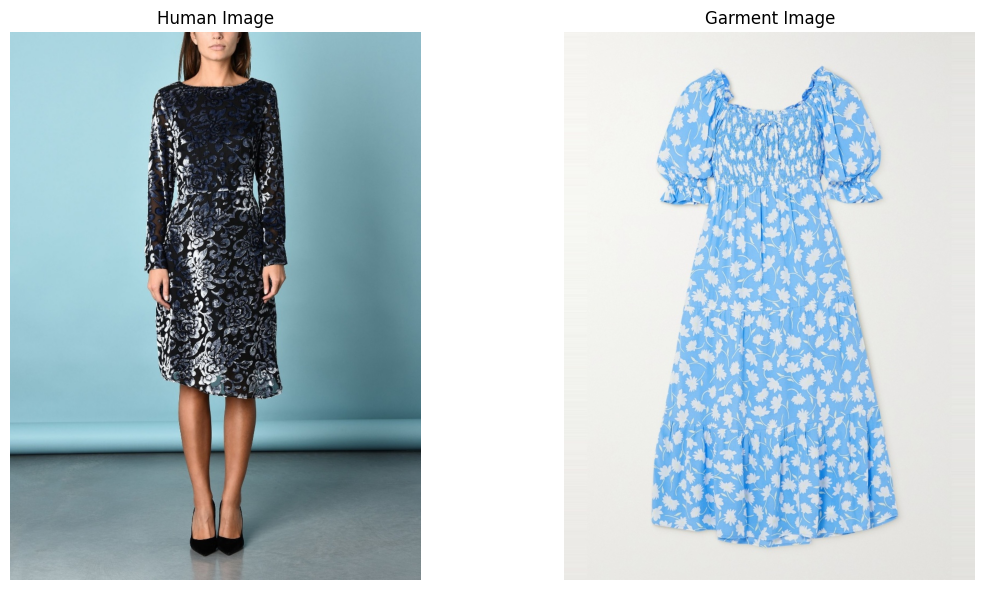

In [5]:
human_img = mpimg.imread(human_image_path)
garment_img = mpimg.imread(garment_image_path)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the images in the subplots
ax[0].imshow(human_img)
ax[0].axis('off')  # Hide the axes for the first image
ax[0].set_title('Human Image')

ax[1].imshow(garment_img)
ax[1].axis('off')  # Hide the axes for the second image
ax[1].set_title('Garment Image')

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
result = client.predict(
    dict={
        "background": file(human_image_path),
        "layers": [],
        "composite": None,
    },
    garm_img=file(garment_image_path),
    garment_des="Replace the garment with the given one",
    is_checked=True,
    is_checked_crop=False,
    denoise_steps=30,
    seed=42,
    api_name="/tryon"
)


Output Image Path: /tmp/gradio/dc75afdb4ffa79f64fd3d914c2cf82f9c6d40c6591e9a0d931e46a9f7b3f9c7d/image.png


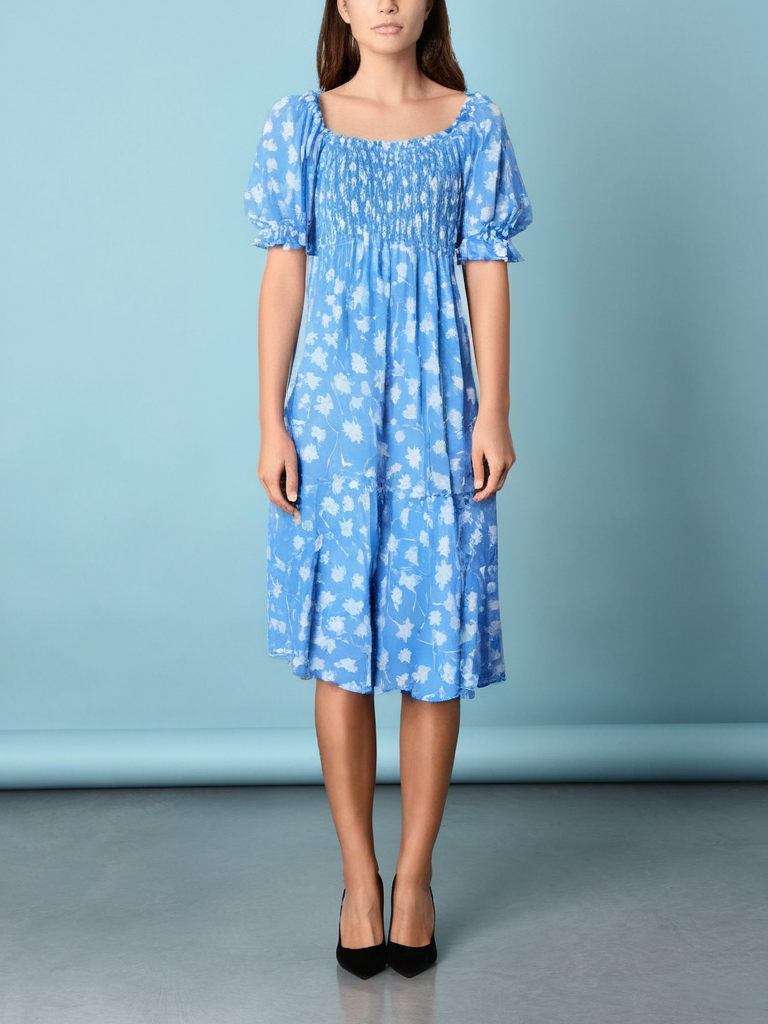

In [7]:
# Display the results
from IPython.display import Image, display

print("Output Image Path:", result[0])
#print("Masked Image Output Path:", result[1])

display(Image(result[0]))
#display(Image(result[1]))
